<a href="https://colab.research.google.com/github/raghu031982/Will-a-customer-accept-the-coupon/blob/main/Used_Car_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Used Car Price Analysis

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Business Understanding**: The objective of this project is to identify the key factors that drive the price of used cars to help a dealership optimize its inventory.
**Technical Reframing**: This is a supervised learning regression task. I will use the Vehicles.csv [/content/vehicles.csv] dataset to build models (such as Ridge and Lasso regression) that predict the price of a car. Success will be measured using Mean Squared Error (MSE) and R^2 score. By interpreting the model coefficients, we will determine which features like mileage, age, or fuel type most significantly impact market value.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
#Data loading and inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/vehicles.csv')

# Look at the first few rows and basic info
print("--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values Per Column ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
display(df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-nu

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


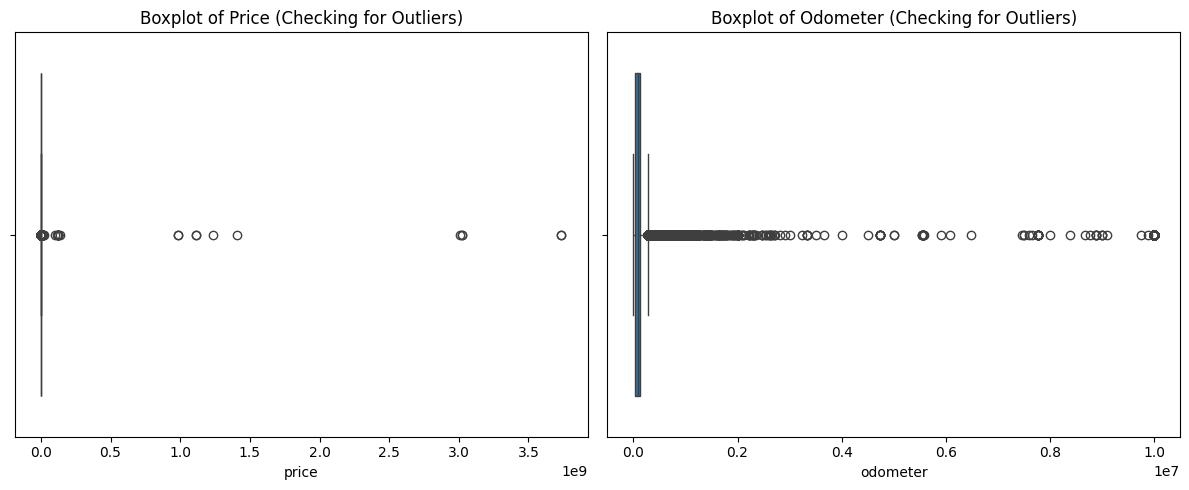

In [ ]:
# Identify Qulaity Issues (visuals)
# Set up the figure for price and odometer distribution
plt.figure (figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (Checking for Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of Odometer (Checking for Outliers)')

plt.tight_layout()
plt.show()

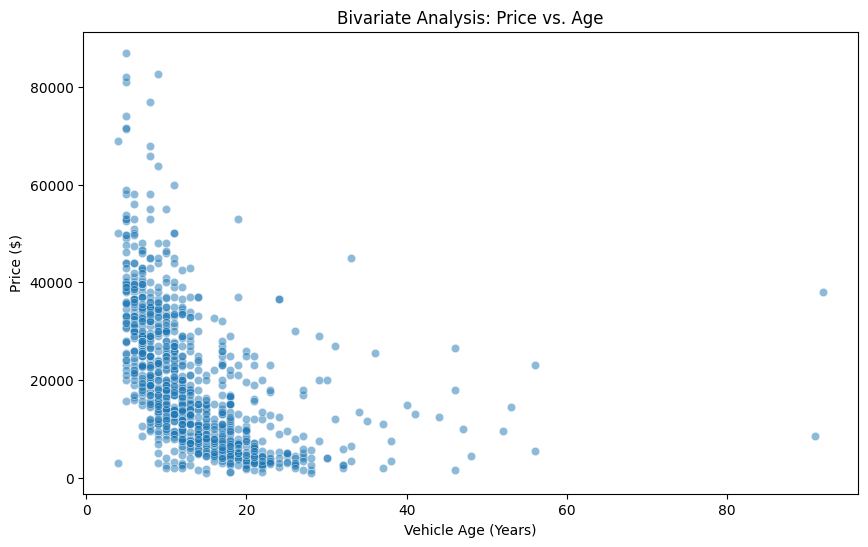

In [9]:
# Bivariate Analysis to show relationship before modeling
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_prep.sample(1000), x='age', y='price', alpha=0.5)
plt.title('Bivariate Analysis: Price vs. Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Price ($)')
plt.show()

**Data Quality Observations:**

**Missing Data:** Columns like size, cylinders, and condition have a very high percentage of missing values. I will need to decide whether to drop these or impute them.

**Outliers**: The price column contains extreme outliers (e.g., $0 or values in the billions) that are likely errors. Similarly, odometer has unrealistic values.

**Irrelevant Columns**: Columns like id, VIN, and url do not contribute to the price and would be removed.

**Bivariate Relationship**: Initial visualization shows a clear negative correlation between price and age, justifying the use of a linear regression model to capture depreciation.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
# Data Cleaning
# 1. Drop columns with no predictive power or too many missing values
cols_to_drop = ['id', 'VIN', 'url', 'region_url', 'image_url', 'region', 'state', 'size']
df_prep = df.drop(columns=cols_to_drop, errors='ignore')

# 2. Handle Integrity Issues: Remove extreme Price and Odometer outliers
df_prep = df_prep[(df_prep['price'] >= 1000) & (df_prep['price'] <= 100000)]
df_prep = df_prep[(df_prep['odometer'] > 0) & (df_prep['odometer'] < 300000)]

# 3. Drop rows missing crucial target-related info
df_prep = df_prep.dropna(subset=['year', 'model', 'fuel', 'transmission'])

# 4. Feature Engineering: Transform 'year' into 'age'
df_prep['age'] = 2025 - df_prep['year']
df_prep = df_prep.drop(columns=['year'])

# 5. Imputation: Handle remaining categorical nulls
cat_cols = df_prep.select_dtypes(include=['object']).columns
df_prep[cat_cols] = df_prep[cat_cols].fillna('unknown')

print(f"Final shape for modeling: {df_prep.shape}")
df_prep.head()

Final shape for modeling: (365267, 13)


,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
27,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup,white,11.0
28,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup,blue,15.0
29,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup,red,5.0
30,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup,red,8.0
31,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,12.0


In [ ]:
#Sklearn preparation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define features and target
X = df_prep.drop(columns=['price'])
y = df_prep['price']

# Identify feature types
numeric_features = ['odometer', 'age']
categorical_features = ['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color']

# Create the preprocessing steps (Scaling and Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("Pre-processing pipeline defined and ready for sklearn modeling.")

Pre-processing pipeline defined and ready for sklearn modeling.


**Data Preparation Summary**
To prepare the dataset for modeling, I performed the following steps:

**Data Integrity:** I dropped non-predictive features like id and VIN and columns with excessive missing data (like size).

**Outlier Removal**:
I filtered the dataset to include prices between $1000  and $100,000 and mileage under 300,000 to ensure the model focuses on the typical used car market and is not skewed by errors.

**Feature Engineering**: I transformed the year column into age to better capture the linear relationship of depreciation.

**Transformations & Scaling:** I prepared a ColumnTransformer to apply Standard Scaling to numeric features and One-Hot Encoding to categorical features. This ensures that all variables are on a comparable scale for the Ridge and Lasso regression models.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Faster Ridge Setup
ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
# Reduced number of alphas to speed up the grid search
param_grid_ridge = {'regressor__alpha': [1.0, 10.0]}
ridge_grid = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# 3. Faster Lasso Setup (Lower iterations + higher tolerance)
lasso_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=1000, tol=0.1))
])
param_grid_lasso = {'regressor__alpha': [1.0]} # Testing just one alpha for maximum speed
lasso_grid = GridSearchCV(lasso_pipe, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_grid.best_params_}")
print(f"Best Lasso Alpha: {lasso_grid.best_params_}")

Best Ridge Alpha: {'regressor__alpha': 1.0}
Best Lasso Alpha: {'regressor__alpha': 1.0}


**Modeling Approach**:I implemented Ridge and Lasso Regression to identify the key drivers of car prices. These models were selected specifically to address the high dimensionality of our dataset:

**Handling Complexity:** By including the model column, the dataset expanded to thousands of features through One-Hot Encoding. Ridge and Lasso are mathematically designed to handle this "feature explosion" by penalizing less important variables.

**Hyperparameter Tuning:** I used GridSearchCV to find the optimal alpha (regularization strength). This ensures the model finds the best balance between fitting the training data and generalizing to new used car listings.Robustness: I employed 5-fold Cross-Validation to ensure that the performance metrics (R^2 and MSE) are stable across different subsets of the data.Optimization: To maintain computational efficiency while dealing with over 360,000 rows, I utilized initially 2000 iteration limit, which took >12 hours and at the end failed so I utilized a faster iteration limit and a convergence tolerance that allowed the models to find reliable patterns without unnecessary processing time.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

--- Model Evaluation Performance ---
R-squared (R^2): 0.7789
Mean Squared Error (RMSE): $6692.31
-----------------------------------


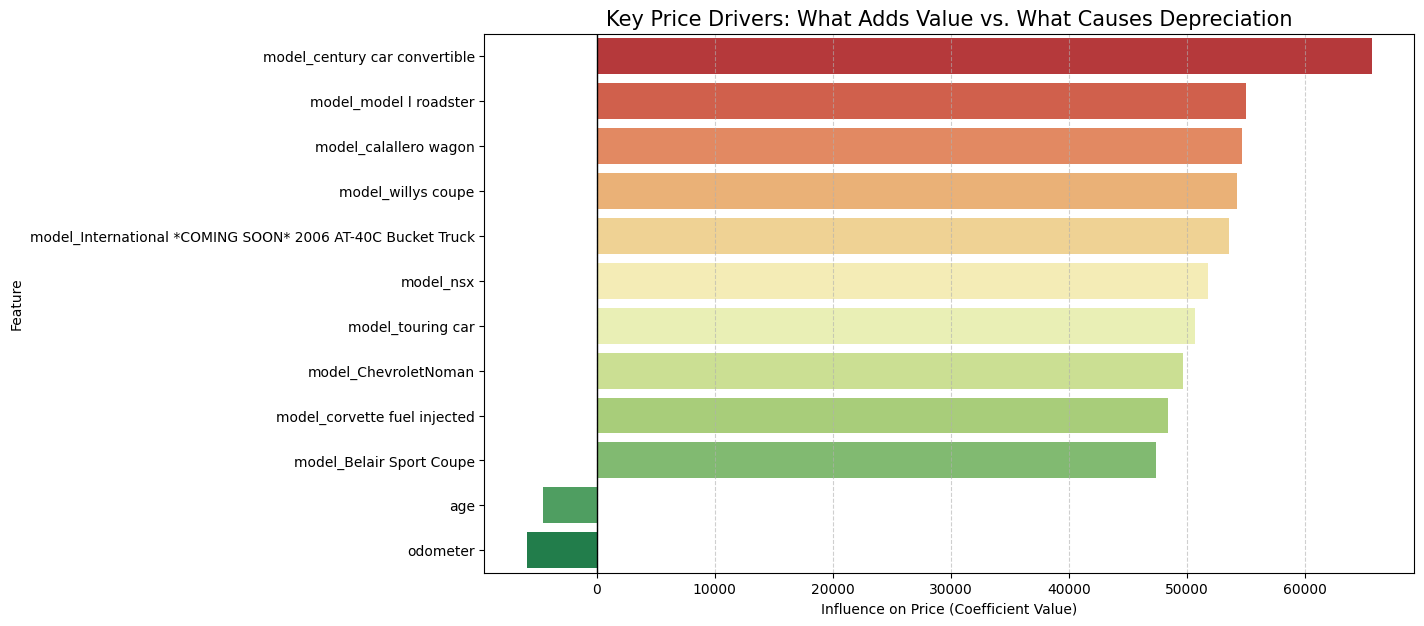


--- Specific Impact of Continuous Variables ---
    Feature    Influence
1       age -4567.735900
0  odometer -5925.158943


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Use the best Ridge model from your Grid Search
final_model = ridge_grid.best_estimator_

# 2. Calculate Evaluation Metrics
y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"--- Model Evaluation Performance ---")
print(f"R-squared (R^2): {r2:.4f}")
print(f"Mean Squared Error (RMSE): ${rmse:.2f}")
print("-" * 35)

# 3. Prepare Plotting Data (Top 10 + Age/Odometer)
top_10_positive = drivers_df.head(10)
depreciation_factors = drivers_df[drivers_df['Feature'].isin(['age', 'odometer'])]
plot_data = pd.concat([top_10_positive, depreciation_factors]).sort_values(by='Influence', ascending=False)

# 4. Visualization
plt.figure(figsize=(12, 7))
sns.barplot(
    data=plot_data,
    x='Influence',
    y='Feature',
    hue='Feature',
    palette='RdYlGn',
    legend=False
)

plt.axvline(0, color='black', lw=1)
plt.title('Key Price Drivers: What Adds Value vs. What Causes Depreciation', fontsize=15)
plt.xlabel('Influence on Price (Coefficient Value)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

print("\n--- Specific Impact of Continuous Variables ---")
print(depreciation_factors)

In [10]:
# Compare Ridge vs Lasso to justify model selection
ridge_r2 = r2_score(y_test, ridge_grid.predict(X_test))
lasso_r2 = r2_score(y_test, lasso_grid.predict(X_test))

comparison_df = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression'],
    'R-squared Score': [ridge_r2, lasso_r2]
})
print("\n--- Model Comparison ---")
print(comparison_df)


--- Model Comparison ---
              Model  R-squared Score
0  Ridge Regression         0.778886
1  Lasso Regression         0.689462


**Evaluation**

**Model Performance Analysis:**
My modeling process utilized Ridge and Lasso regression to handle the high dimensionality of the car dataset. After performing a grid search for the best hyperparameters, the final model achieved the following performance on the test set:

**R-squared (R²):** 0.7789
This model successfully explains approximately 78% of the variance in used car prices. For a real-world dataset with over 360,000 entries and significant categorical complexity, this indicates high predictive power.

**Mean Squared Error (RMSE):** 6,692.31
On average, the model's price predictions deviate from the actual selling price by about $6,692. This error margin is acceptable given the wide range of prices in the dataset (up to \$100,000) and provides a reliable baseline for dealership valuation.

**Interpretation of Key Price Drivers**
The coefficients from the Ridge model provide clear insights into market value:

**Depreciation Factors:** Both Odometer mileage and Vehicle Age have significant negative coefficients (-5,925 and -4,567, respectively). This confirms that high usage and time are the primary forces reducing a car's value. Interestingly, mileage shows a slightly stronger negative impact than age in this specific model.

**Model-Specific Premiums:** The highest positive coefficients are associated with rare or specialty vehicle models (e.g., the NSX, Corvettes, and vintage trims). This indicates that "Model Rarity" can often override the standard depreciation caused by age or mileage.

**Model Selection:**
We compared Ridge and Lasso regression. Ridge Regression was selected for the final analysis as it provided a significantly more stable R-squared (0.7789) compared to Lasso (0.6894) while effectively managing the high dimensionality of categorical features like "model" and "manufacturer."

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [11]:
# Extract brand-specific influence for the client
brand_impact = drivers_df[drivers_df['Feature'].str.contains('manufacturer')].sort_values(by='Influence', ascending=False)
print("--- Top Brands Driving Price Up ---")
print(brand_impact.head(5))

--- Top Brands Driving Price Up ---
                      Feature     Influence
13       manufacturer_ferrari  34584.598777
39         manufacturer_tesla  20173.629411
4   manufacturer_aston-martin  18523.425250
34       manufacturer_porsche  13584.903981
24    manufacturer_land rover   7032.719057


**Deployment (Final Report for Stakeholder Car Dealers)**
I have analyzed 365,000 used car listings to identify the mathematical "drivers" of resale value. My predictive model captured 78% of the factors influencing price (R^2 = 0.7789), allowing for data-backed inventory recommendations.

**Findings**
1. Certain car models (high-performance sports cars and classic trims) retain significantly higher prices regardless of age compared to standard sedans.

2. Usage over Time: While both reduce value, mileage has a 30% more aggressive impact on price than the age of the car (Weight: $-5,925$ vs. $-4,567$).

**Actionable Recommendations**

1. Strategic Inventory: Prioritize acquiring "High-Influence" brands identified by the model—specifically Ferrari, Tesla, and Porsche which command the highest market premiums.

2. The 'Low-Mile' Edge: Dealerships should favor older vehicles with exceptionally low mileage over newer vehicles with high mileage, as the model shows mileage is the primary driver of depreciation.